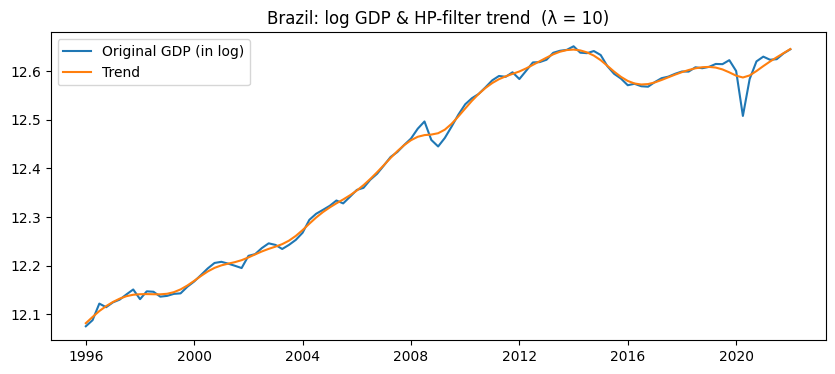

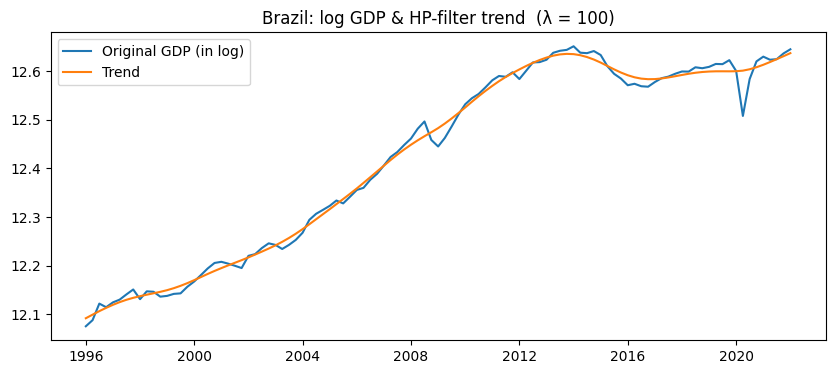

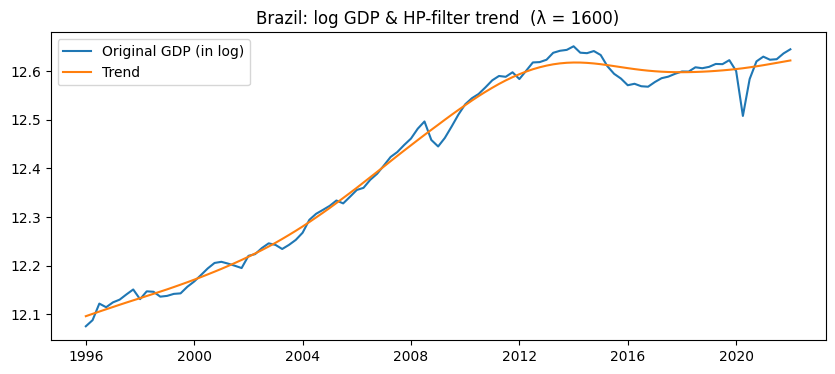

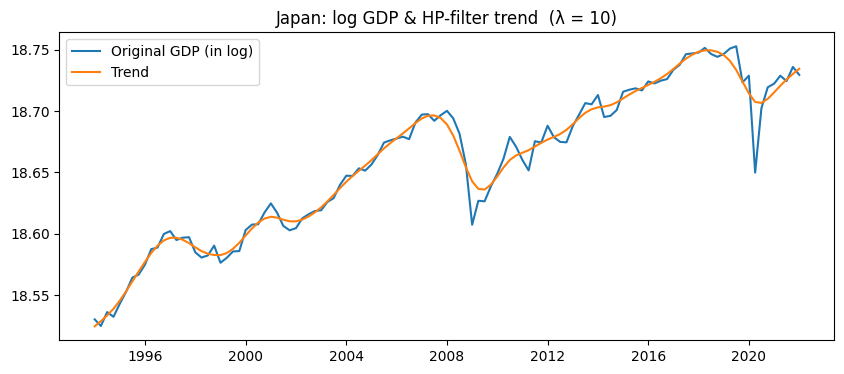

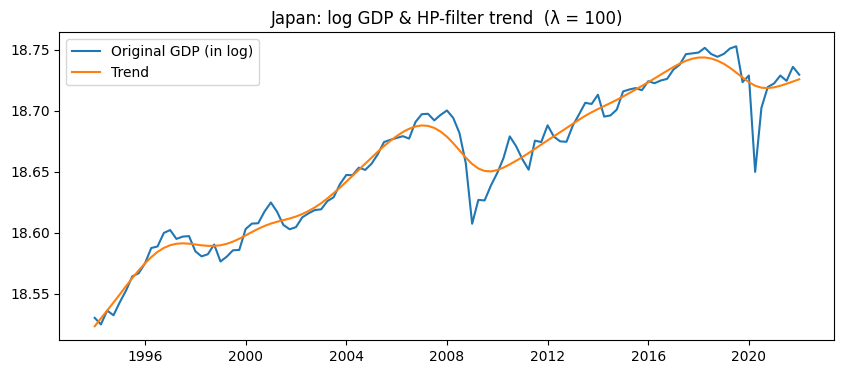

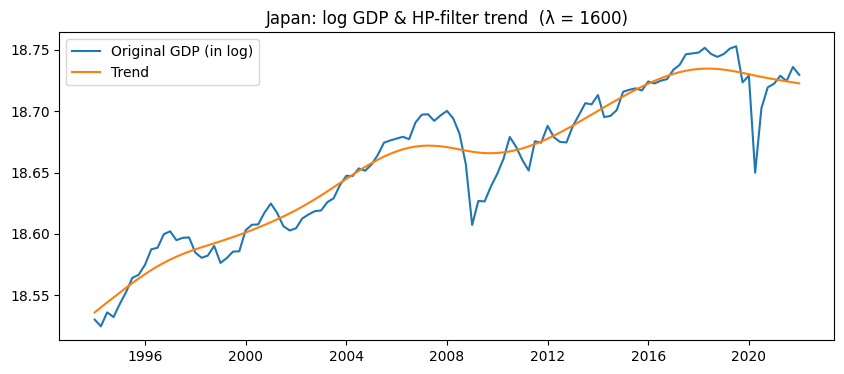


Standard deviations of cyclical component and Brazil–Japan correlations:

              10       100      1600  Corr_with_Japan
Brazil  0.011323  0.014965  0.018848              NaN
Japan   0.008857  0.012007  0.016093              NaN


In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'
lambdas = [10, 100, 1600]
# download the data from FRED using pandas_datareader
country_series = {
    "Brazil":'NGDPRSAXDCBRQ',
    "Japan" :'NGDPRSAXDCJPQ',
}
# collect all cyclical components
cycle_data = {country: {} for country in country_series}

# for loop of each country
for country, series_id in country_series.items():
    gdp = web.DataReader(series_id, 'fred', start_date, end_date)
    log_gdp = np.log(gdp[series_id])

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
# use for loop to compute every lambda

    for lamb in lambdas:
        cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb)
        cycle_data[country][lamb] = cycle
        
    # Plot the original time series data
        plt.figure(figsize=(10, 4))
        plt.plot(log_gdp, label="Original GDP (in log)")
        plt.title(f'{country}: log GDP & HP-filter trend  (λ = {lamb})')

    # Plot the trend component
        plt.plot(trend, label="Trend")

    # Add a legend and show the plot
        plt.legend()
        plt.show(block=False)
        plt.pause(0.1)

# compute standard deviations and correlations
std_devs    = pd.DataFrame(index=country_series.keys(), columns=lambdas, dtype=float)
correlations = pd.Series(index=lambdas, dtype=float)

for lamb in lambdas:
    # std dev of cycle for each country
    for country in country_series:
        std_devs.loc[country, lamb] = cycle_data[country][lamb].std()
    # correlation between Brazil and Japan
    correlations[lamb] = cycle_data['Brazil'][lamb].corr(cycle_data['Japan'][lamb])

# display the results as a table
stats = std_devs.copy()
stats['Corr_with_Japan'] = correlations
print("\nStandard deviations of cyclical component and Brazil–Japan correlations:\n")
print(stats)
